**Путешествие к открытию нового производственного предприятия**

In [ ]:
%% pip install -q matplotlib numpy pandas scipy

## Прежде чем мы начнём



Задания для этому ноутбуку:
- Добавьте к каждой главе:
  - выберите код из коллекции, который будет наиболее применим.
  - изобразите результат.
  - объясните, почему вы это сделали, в дополнительной ячейке markdown.
  - проанализируйте результат на предмет применимости метода и возможных путей улучшения.
- В конце ноутбука приведите полный анализ, основанный на вопросах.

Не стесняйтесь изменять данные и методы для достижения лучших результатов, проявляйте творческий подход к обучению! Не ограничивайте себя знаниями текущего занятия или курса вычислительной математики!

<Figure size 600x400 with 0 Axes>

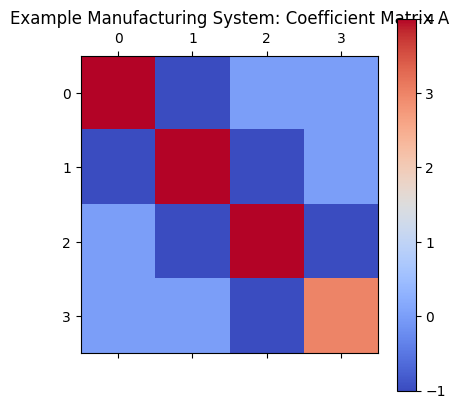

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu, solve, norm

# Load the data for a manufacturing problem
# Sample data (could be a matrix and a vector for a SLAE)
A = np.array([
    [4, -1, 0, 0],
    [-1, 4, -1, 0],
    [0, -1, 4, -1],
    [0, 0, -1, 3]
], dtype=float)

b = np.array([15, 10, 10, 10], dtype=float)

# Plot the matrix and vector
plt.figure(figsize=(6, 4))
plt.matshow(A, cmap='coolwarm')
plt.colorbar()
plt.title("Example Manufacturing System: Coefficient Matrix A")
plt.show()

### Коллекция примеров методов решения СЛАУ:

### **1. Метод Гаусса**

In [2]:
def gauss_elimination(A, b):
    n = len(b)
    # Augment matrix A with vector b
    Augmented = np.hstack([A, b.reshape(-1, 1)])
    
    # Forward elimination
    for i in range(n):
        # Partial pivoting
        max_row = np.argmax(np.abs(Augmented[i:n, i])) + i
        Augmented[[i, max_row]] = Augmented[[max_row, i]]
        
        for j in range(i+1, n):
            factor = Augmented[j, i] / Augmented[i, i]
            Augmented[j, i:] -= factor * Augmented[i, i:]
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Augmented[i, -1] - np.dot(Augmented[i, i+1:n], x[i+1:])) / Augmented[i, i]
    
    return x

# Solve using Gauss Elimination
x_gauss = gauss_elimination(A, b)
print("Solution using Gauss Elimination:", x_gauss)

# Compare with built-in solver
x_scipy = solve(A, b)
print("Solution using SciPy solver:", x_scipy)

Solution using Gauss Elimination: [5. 5. 5. 5.]
Solution using SciPy solver: [5. 5. 5. 5.]


### **2. Метод Гаусса с выбором главного элемента**

In [3]:

from scipy.linalg import lu_factor, lu_solve
def gauss_elimination_pivoting(A, b):
    n = len(b)
    Augmented = np.hstack([A, b.reshape(-1, 1)])
    
    for i in range(n):
        max_row = np.argmax(np.abs(Augmented[i:n, i])) + i
        Augmented[[i, max_row]] = Augmented[[max_row, i]]
        
        for j in range(i+1, n):
            factor = Augmented[j, i] / Augmented[i, i]
            Augmented[j, i:] -= factor * Augmented[i, i:]
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Augmented[i, -1] - np.dot(Augmented[i, i+1:n], x[i+1:])) / Augmented[i, i]
    
    return x

# Solve using Gauss Elimination with Pivoting
x_gauss_pivoting = gauss_elimination_pivoting(A, b)
print("Solution using Gauss Elimination with Pivoting:", x_gauss_pivoting)


from scipy.linalg import lu_factor, lu_solve

# Compute LU-factorization with pivoting
lu, piv = lu_factor(A)
# Solve the linear system using the factorization
x = lu_solve((lu, piv), b)
print("Solution using LU-decomposition with Pivoting:", x)


Solution using Gauss Elimination with Pivoting: [5. 5. 5. 5.]
Solution using LU-decomposition with Pivoting: [5. 5. 5. 5.]


### **Метод прогонки/ метод Томаса**

In [4]:
def thomas_algorithm(A, b):
    n = len(b)
    # Forward sweep
    for i in range(1, n):
        factor = A[i, i-1] / A[i-1, i-1]
        A[i, i] -= factor * A[i-1, i]
        b[i] -= factor * b[i-1]
    
    # Back substitution
    x = np.zeros(n)
    x[-1] = b[-1] / A[-1, -1]
    for i in range(n-2, -1, -1):
        x[i] = (b[i] - A[i, i+1] * x[i+1]) / A[i, i]
    
    return x

# Apply Thomas method (for a tridiagonal system)
A_thomas = np.array([
    [4, -1, 0, 0],
    [-1, 4, -1, 0],
    [0, -1, 4, -1],
    [0, 0, -1, 3]
], dtype=float)

x_thomas = thomas_algorithm(A_thomas, b)
print("Solution using Thomas Method:", x_thomas)


Solution using Thomas Method: [5. 5. 5. 5.]


### **Метод разложения Холецкого**

In [5]:
import numpy as np
from scipy.linalg import cholesky, cho_factor, cho_solve

import numpy as np

# Example SPD matrix A and right-hand side vector b.
A = np.array([[6, 15, 55],
              [15, 55, 225],
              [55, 225, 979]], dtype=float)
b = np.array([76, 295, 1259], dtype=float)

# Compute the Cholesky factor L such that A = L @ L.T
L = np.linalg.cholesky(A)

# Forward substitution: Solve L y = b for y.
y = np.linalg.solve(L, b)

# Backward substitution: Solve L.T x = y for x.
x = np.linalg.solve(L.T, y)

print("Solution using NumPy:", x)

# Compute the lower triangular factor L.
L = cholesky(A, lower=True)

print("Cholesky factor L (SciPy):\n", L)

# Verify the reconstruction.
A_reconstructed = L @ L.T
print("\nReconstructed A:\n", A_reconstructed)

# Perform the Cholesky factorization.
# The function cho_factor returns a factor and a flag indicating that it's lower–triangular.
factor, lower = cho_factor(A) 

# Solve A x = b using the Cholesky factorization.
x = cho_solve((factor, lower), b)

print("Solution using SciPy:", x)


Solution using NumPy: [1. 1. 1.]
Cholesky factor L (SciPy):
 [[ 2.44948974  0.          0.        ]
 [ 6.12372436  4.18330013  0.        ]
 [22.45365598 20.91650066  6.11010093]]

Reconstructed A:
 [[  6.  15.  55.]
 [ 15.  55. 225.]
 [ 55. 225. 979.]]
Solution using SciPy: [1. 1. 1.]


### **Метод простых итераций**

In [6]:
import numpy as np

def simple_iteration_jacobi(A, b, x0=None, tol=1e-8, max_iter=1000):
    """
    Solve the system Ax = b using the Jacobi (simple iteration) method.
    
    Parameters:
        A       : numpy.ndarray, coefficient matrix (should be diagonally dominant for convergence)
        b       : numpy.ndarray, right-hand side vector
        x0      : numpy.ndarray, initial guess for the solution (default is zero vector)
        tol     : float, tolerance for convergence (stopping criterion on infinity norm of the change)
        max_iter: int, maximum number of iterations allowed
        
    Returns:
        x       : numpy.ndarray, approximate solution vector
        k       : int, number of iterations performed
    """
    n = A.shape[0]
    
    # Initial guess (if not provided)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()
    
    # Extracting Diagonal D and remainder R from A
    D = np.diag(A)
    if np.any(np.isclose(D, 0)):
        raise ValueError("Zero detected on the diagonal. The Jacobi method requires non-zero diagonal entries.")
    
    # Pre-calculate the inverse of the diagonal for efficient vectorized updates
    invD = 1.0 / D
    R = A - np.diagflat(D)
    
    # Iterative update
    for k in range(max_iter):
        # Update rule: x_new = invD * (b - R*x)
        x_new = invD * (b - np.dot(R, x))
        
        # Check for convergence based on infinity norm
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1  # converged
        
        x = x_new.copy()
    
    # If convergence was not reached within max_iter iterations, return the last iterate.
    return x, max_iter

# Example usage:
if __name__ == '__main__':
    # Define a diagonally dominant matrix A and vector b.
    A = np.array([
        [10, -1, 2, 0],
        [-1, 11, -1, 3],
        [2, -1, 10, -1],
        [0, 3, -1, 8]
    ], dtype=float)
    b = np.array([6, 25, -11, 15], dtype=float)
    
    # Solve using the simple iteration (Jacobi) method.
    solution, iterations = simple_iteration_jacobi(A, b, tol=1e-8, max_iter=1000)
    
    print("Solution:", solution)
    print("Iterations:", iterations)
    
    # Verification:
    residual = np.linalg.norm(np.dot(A, solution) - b, ord=2)
    print("Residual (2-norm):", residual)


Solution: [ 1.  2. -1.  1.]
Iterations: 24
Residual (2-norm): 3.4429991813408444e-08


### **Метод Гаусса-Зейделя**

In [7]:
import numpy as np

def gauss_seidel(A, b, x0=None, tol=1e-8, max_iter=1000):
    """
    Solve the system Ax = b using the Gauss-Seidel iterative method.
    
    Parameters:
        A        : numpy.ndarray, coefficient matrix (n x n), assumed to be diagonally dominant or SPD.
        b        : numpy.ndarray, right-hand side vector (n,)
        x0       : numpy.ndarray, initial guess (default: zero vector)
        tol      : float, tolerance for convergence (infinity norm)
        max_iter : int, maximum number of iterations
        
    Returns:
        x        : numpy.ndarray, approximate solution vector
        k        : int, number of iterations performed
    """
    n = A.shape[0]
    
    # Initial guess for the solution vector
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()
    
    # Iterative update
    for k in range(max_iter):
        x_new = x.copy()  # Create a copy for the new iterate
        
        for i in range(n):
            # Update each x[i] using the latest available values:
            # Use the new values for x[0:i] and the old values for x[i+1:n].
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        
        # Check for convergence using the infinity norm (max absolute change)
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, k + 1  # Returning the solution and iteration count
        
        x = x_new.copy()
    
    return x, max_iter  # If convergence is not reached within max_iter iterations

# Example usage:
if __name__ == '__main__':
    # Define a diagonally dominant (or SPD) matrix A and right-hand side vector b.
    A = np.array([[4.0, 1.0, 2.0],
                  [3.0, 5.0, 1.0],
                  [1.0, 1.0, 3.0]])
    b = np.array([4.0, 7.0, 3.0])
    
    # Solve the system using the Gauss-Seidel method
    solution, iterations = gauss_seidel(A, b, tol=1e-8, max_iter=1000)
    
    print("Gauss-Seidel Solution:", solution)
    print("Iterations:", iterations)
    
    # Verification: Compute A * solution and compare with b.
    residual = np.linalg.norm(np.dot(A, solution) - b)
    print("Residual (2-norm):", residual)


Gauss-Seidel Solution: [0.5 1.  0.5]
Iterations: 13
Residual (2-norm): 6.755296488517047e-09


### **Метод подпространств Крылова**

In [10]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

# Constructing a sample sparse SPD matrix for demonstration.
# For example, a 1D Laplacian:
n = 1000
diagonals = [2*np.ones(n), -1*np.ones(n-1), -1*np.ones(n-1)]
A = sp.diags(diagonals, [0, -1, 1], format='csr')

# Define right-hand side vector b.
b = np.ones(n)

# Solve using the Conjugate Gradient method.
x, info = spla.cg(A, b, atol=1e-8, maxiter=1000)

if info == 0:
    print("CG converged!")
else:
    print("CG did not converge within the provided maximum iterations.")

# Verification: Compute the residual norm ||Ax - b||
residual = np.linalg.norm(A @ x - b)
print("Residual norm:", residual)


import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

# Constructing a sample sparse matrix A.
# For demonstration, we can use the same matrix as before or another example.
n = 1000
diagonals = [2*np.ones(n), -1*np.ones(n-1), -1*np.ones(n-1)]
A = sp.diags(diagonals, [0, -1, 1], format='csr')

# Define right-hand side vector b.
b = np.ones(n)

# Solve using the GMRES method.
x, exitCode = spla.gmres(A, b, atol=1e-8, restart=50, maxiter=1000)

if exitCode == 0:
    print("GMRES converged!")
else:
    print("GMRES did not converge properly, exit code:", exitCode)

# Verification: Compute the residual norm ||Ax - b||
residual = np.linalg.norm(A @ x - b)
print("Residual norm:", residual)

CG converged!
Residual norm: 0.0
GMRES converged!
Residual norm: 0.000316157494967177


---

**Глава 1. Мечта о расширении**

Алекс Митчелл всегда мечтал о развитии своего бизнеса. После нескольких лет успешной работы в своей небольшой компании по серийному производству он понял, что для удовлетворения растущего спроса на его продукцию ему необходимо открыть новое производственное предприятие. Решение было принято: его компания будет расширяться, но для воплощения этого видения в жизнь потребуется решить ряд сложных проблем.

---

**Глава 2. Первое препятствие – анализ местоположения**

Первой проблемой, с которой столкнулся Алекс, было решение о том, где построить новый завод. Потенциальных мест для строительства было множество: от городских центров с хорошей инфраструктурой до сельской местности с более дешевыми земельными участками. Тем не менее, каждый выбор был сопряжен со своим набором компромиссов.

*Проблема: должен ли он выбрать недорогую землю в сельской местности с плохим транспортным сообщением или в дорогом городском районе с налаженной логистикой?*

Алекс знал, что ему нужно решение, позволяющее сопоставить все факторы — стоимость, близость к поставщикам, транспортировку и наличие рабочей силы. Для этого потребуется провести анализ затрат и выгод, чтобы найти наилучшее местоположение. После нескольких недель исследований и консультаций с градостроителями и экспертами по транспорту Алекс остановил свой выбор на пригородном районе, который предлагал сбалансированное сочетание более низкой стоимости земли, доступа к квалифицированной рабочей силе и близости к основным магистралям.

*Решение: Анализ местоположения был проведен с помощью модели взвешенной оценки, в которой каждому фактору (стоимость, трудозатраты, транспортировка) была присвоена оценка. Это помогло Алексу наглядно представить компромиссы и принять обоснованное решение.*

Алексу необходимо сравнить различные потенциальные местоположения заводов на основе нескольких факторов, таких как:

- **Стоимость земли**
- **Транспортные расходы**
- **Наличие инфраструктуры (например, электричества, воды, дорог).**

Каждый из этих факторов имеет разный вес, и Алекс оценивает каждое местоположение по каждому из этих факторов. Для простоты давайте предположим, что Алекс сравнивает пять местоположений (местоположение A, Местоположение B и местоположение C), а переменные решения представляют собой оценки для каждого местоположения.

**Определите переменные**: 
Допустим, Алекс рассматривает три потенциальных местоположения (A, B и C). Мы можем обозначить затраты и выгоды для каждого местоположения следующим образом:
- $𝑥_1$: Чистая выгода для местоположения A
- $𝑥_2$: Чистая выгода для местоположения B
- $𝑥_3$: Чистая выгода для местоположения C

$$ \begin{cases} 3x_1 + 2x_2 + x_3 = 15 & \text{(Уравнение 1: Отражает ограничения, такие как стоимость земли)} \\ 2x_1 + 3x_2 + 2x_3 = 18 & \text{(Уравнение 2: Отражает другой набор ограничений, таких как стоимость транспортировки)} \\ x_1 + 2x_2 + 3x_3 = 10 & \text{(уравнение 3: отражает другой набор ограничений, например, доступность инфраструктуры)} \end{cases} $$

**Расширенное матричное представление**: 
Преобразуем систему уравнений в расширенную матрицу: $$ \left[\begin{array}{ccc|c} 3 & 2 & 1 & 15 \\ 2 & 3 & 2 & 18 \\ 1 & 2 & 3 & 10 \end{array}\right] $$

Теперь мы могли бы применить метод решения СЛАУ, чтобы получить результат.

[ 1.625  5.5   -0.875]
For location A the score is: 1.6249999999999993
For location B the score is: 5.500000000000001
For location C the score is: -0.8750000000000004
The best location is B with a score of 5.500000000000001


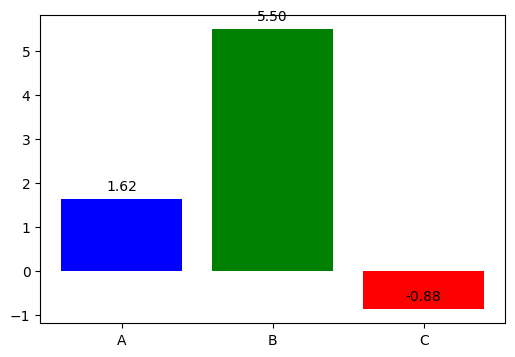

In [14]:
matrix_A = np.array([[3,2,1], [2, 3, 2], [1, 2, 3]], dtype=float)  # 3x3 matrix
matrix_B = np.array([15, 18, 10], dtype=float)  # 3x1 matrix

x = gauss_elimination(matrix_A, matrix_B)
x_1, x_2, x_3 = x

print(x)
print(f"For location A the score is: {x_1}")
print(f"For location B the score is: {x_2}")
print(f"For location C the score is: {x_3}")
print(f"The best location is {['A', 'B', 'C'][np.argmax(x)]} with a score of {max(x)}")

plt.figure(figsize=(6, 4))
locations = ['A', 'B', 'C']
plt.bar(locations, x, color=['blue', 'green', 'red'])

for i, v in enumerate(x):
    plt.text(i, v + 0.2, f"{v:.2f}", ha='center')

plt.show()

#### Постройте графики и проанализируйте результат применения метода. Поясните, почему был выбран именно этот метод.
Возьмем метод Гаусса, так как он самый универсальный + у нас небольшая матрица, ненулевый коэффициенты, и на вскидку матрица обратима.

Исходя из результатов, локация B будет являться наиболее выгодной для нас. Вторым по выгодности будет локация A, но она сильно отличается по выгодности. Третьей является локация C, в ней выгода отрицательная и это можно считать за "убытки".

---

**Глава 3. Обеспечение безопасности цепочки поставок**

Теперь, когда местоположение было определено, Алекс обратил свое внимание на один из самых важных аспектов: цепочку поставок. Ему нужно было обеспечить эффективное поступление сырья, что означало поиск надежных поставщиков. Однако Алекс искал не просто самые дешевые варианты; ему нужны были поставщики, которые могли бы стабильно поставлять качественные материалы в срок.

*Проблема: как ему оценить и выбрать поставщиков, минимизировав при этом риски задержек или некачественных материалов?*

Он решил провести "процесс оценки поставщиков", в ходе которого проанализировал результаты деятельности, надежность и масштабируемость каждого потенциального поставщика за прошлые периоды. После отправки запросов предложений и оценки их ответов Алекс выбрал несколько поставщиков с хорошей репутацией в области качества и надежности. Чтобы избежать "узких мест", он также диверсифицировал своих поставщиков, чтобы снизить риски, связанные с использованием единственного источника.

*Решение: Алекс внедрил стратегию "двойного поставщика", обеспечив баланс между стоимостью и надежностью, договорившись о выгодных условиях с несколькими поставщиками.*

**Определите переменные**: Допустим, Алекс оценивает трех поставщиков (S1, S2, S3) на основе их оценок качества и надежности. Мы можем обозначить их как:
- $𝑥_1$: Оценка качества и надежности для поставщика 1 (S1).
- $𝑥_2$: Оценка качества и надежности для поставщика 2 (S2)
- $𝑥_3$: оценка качества и надежности для поставщика 3 (S3)

**Составьте уравнения**: Основываясь на ответах и критериях, Алекс может составить уравнения, отражающие показатели качества и надежности. Предположим, что система уравнений выглядит следующим образом: $$ \begin{cases} x_1 + 2x_2 + 3x_3 = 10 & \text{(Equation 1)} \\ 4x_1 + 5x_2 + 6x_3 = 20 & \text{(Equation 2)} \\ 7x_1 + 8x_2 + 9x_3 = 30 & \text{(Equation 3)} \end{cases} $$

Теперь Алекс решил попробовать метод Гаусса-Зайделя для решения этой СЛАУ.

Итерация Гаусса-Зейделя: Чтобы применить метод Гаусса-Зейделя, Алекс может начать с первоначальных предположений для $𝑥_1$, $𝑥_2$, и $𝑥_3$ и итеративно улучшать эти предположения. Давайте предположим, что первоначальные предположения: 
$𝑥_1^{(0)} = 0, 𝑥_2^{(0)} = 0, 𝑥_3^{(0)} = 0$.

**Итеративный процесс**: Метод Гаусса-Зайделя обновляет каждую переменную по очереди, используя самые последние значения для других переменных:

Для первой итерации: $$ x_1^{(1)} = (10 - 2x_2^{(0)} - 3x_3^{(0)}) \\ x_1^{(1)} = (10 - 2(0) - 3(0)) / 1 \\ x_1^{(1)} = 10 $$

Для второй итерации: $$ x_1^{(2)} = (10 - 2x_2^{(1)} - 3x_3^{(1)}) \\ x_1^{(2)} = (10 - 2(0) - 3(-4.44)) \\ x_1^{(2)} \approx 23,32 $$

Этот итеративный процесс продолжается до тех пор, пока значения $𝑥_1$, $𝑥 _2$ и $𝑥 _3$ не станут стабильными.

**Выбор поставщиков**: Как только значения стабилизируются, Алекс может сравнить результаты. Поставщики, набравшие самые высокие баллы, будут считаться лучшими с точки зрения качества и надежности.

[ 7.68921748e+271 -5.38245224e+271 -1.19610050e+271]
For the supplier A the score is: 7.689217480725636e+271
For the supplier B the score is: -5.382452236507945e+271
For the supplier C the score is: -1.1961004970017654e+271
The best suppliers are A and C with a score of 7.689217480725636e+271 and -1.1961004970017654e+271 respectively


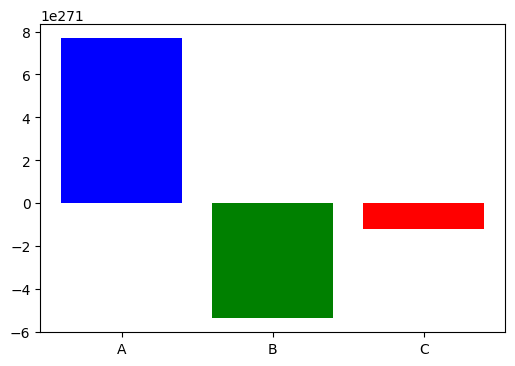

In [25]:
matrix_A = np.array([[1,2,3], [4, 5, 6], [7, 8, 9]], dtype=float)  # 3x3 matrix
matrix_B = np.array([10, 20, 30], dtype=float)  # 3x1 matrix

# Вызов метода Гаусса-Зейделя
x, iterations = gauss_seidel(matrix_A, matrix_B)

# Распаковка значений
x_1, x_2, x_3 = x

print(x)
print(f"For the supplier A the score is: {x_1}")
print(f"For the supplier B the score is: {x_2}")
print(f"For the supplier C the score is: {x_3}")

best_supplier_score = max(x)
best_supplier = ['A', 'B', 'C'][np.argmax(x)]

sorted_indices = np.argsort(x)[::-1]
second_best_supplier_index = sorted_indices[1]
second_best_supplier = ['A', 'B', 'C'][second_best_supplier_index]

other_suppliers = [supplier for supplier in ['A', 'B', 'C'] if supplier != best_supplier]   # remove the best supplier from the list

print(f"The best suppliers are {best_supplier} and {second_best_supplier} with a score of {best_supplier_score} and {second_best_supplier_score} respectively")

plt.figure(figsize=(6, 4))
suppliers = ['A', 'B', 'C']
plt.bar(suppliers, x, color=['blue', 'green', 'red'])
plt.show()


#### Постройте графики и проанализируйте результат применения метода. Поясните, почему был выбран именно этот метод.
Выбираем этот метод, т.к:
1. Нужно найти стабильное значение
2. У нас диагональная система

С точки зрения стабильности наилучшим оказался поставщик A. У двух других поставщиков стабильность отрицательная.


---

**Глава 4: Задача логистики – оптимизация транспортировки**

Определившись с местоположением и поставщиками, Алекс должен был решить, как доставлять сырье на новый завод и готовую продукцию клиентам. Задача заключалась в оптимизации транспортировки, чтобы минимизировать затраты без ущерба для сроков доставки.

* Проблема: как он мог бы оптимизировать транспортную сеть, чтобы обеспечить своевременную доставку и при этом минимизировать транспортные расходы?*

Алекс сотрудничал с консалтинговой фирмой по логистике, которая помогла ему провести исследование по оптимизации сети. Они оценили наилучшие маршруты, виды транспорта и распределительные центры, которые позволили бы минимизировать транспортные расходы и сократить сроки выполнения заказов. Они также учитывали сезонные колебания спроса и возможные сбои в работе (например, перекрытие дорог или погодные условия).

Решение заключалось в централизации транспортных узлов в стратегически важных местах, что позволило проложить более эффективные маршруты и сократить количество пустых миль.

* Решение: С помощью программного обеспечения для моделирования перевозок и оптимизации маршрутов Алекс разработал систему, которая позволила снизить транспортные расходы на 15% при сохранении своевременности поставок.*

Вот несколько примеров параметров и опций, которые можно было бы включить в матрицу:

- Маршруты и расстояния: Расстояния между распределительными центрами и транспортными узлами.
- Виды транспорта: Стоимость и пропускная способность различных видов транспорта (например, грузовиков, поездов, судов).
- Узлы и склады: Расположение и пропускная способность централизованных узлов и складов.
- Сезонный спрос: сезонные колебания спроса на различные продукты.
- Сроки поставки: Ожидаемые сроки доставки в различные регионы.
- Затраты: Транспортные расходы, включая топливо, оплату труда и техническое обслуживание.
- Сбои в работе: Возможные сбои, такие как закрытие дорог, погодные условия и задержки.
- Ограничения по пропускной способности: Ограничения по пропускной способности транспортных средств и узлов.
- Коэффициент использования: Коэффициент использования для различных транспортных маршрутов и узлов.
- Уровни запасов: Уровни запасов в различных центрах распределения.
- Спрос и предложение: Предложение и востребованность различных продуктов в различных местах.
- Воздействие на окружающую среду: воздействие на окружающую среду и экологичность.
- Уровень обслуживания: требования к уровню обслуживания и показатели удовлетворенности клиентов.
- Количество пустых миль: Минимизация количества пустых миль (расстояние, пройденное без груза).
- Правила: Соблюдение правил транспортировки и стандартов безопасности.
- Расходы на складирование: Расходы, связанные со складированием и хранением.
- Типы продукции: Различные типы продукции и их специфические требования к транспортировке.
- Географические факторы: Географические факторы, такие как рельеф местности и доступность.
- Операционная эффективность: Показатели операционной эффективности и результативности деятельности.
- Расписание перевозок: Графики и расписания для различных видов транспорта.

GMRES converged!
Residual norm: 9.953383160477617e-16


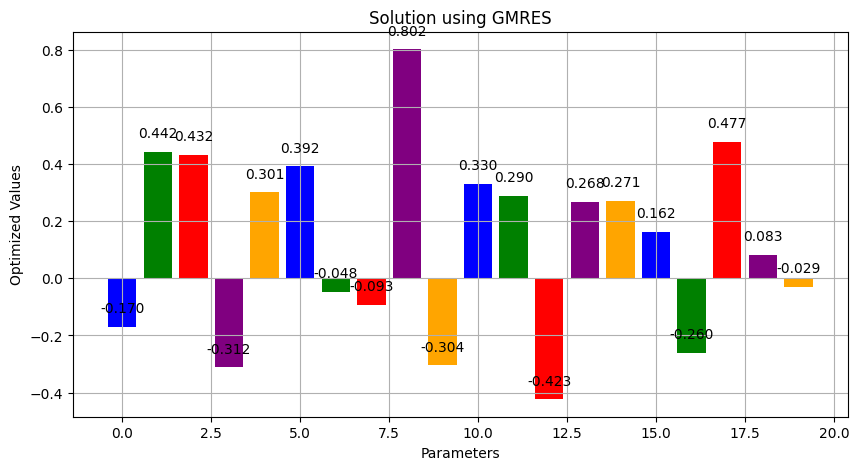

Objective: Routes and Distances: Distances between distribution centers and transportation hubs.: -0.1702254615341819
Objective: Transportation Modes: Costs and capacities of different transportation modes (e.g., trucks, trains, ships).: 0.4417177753650459
Objective: Hubs and Warehouses: Locations and capacities of centralized hubs and warehouses.: 0.43175285240359257
Objective: Seasonal Demand: Seasonal fluctuations in demand for different products.: -0.31164599072210836
Objective: Lead Times: Expected lead times for deliveries to various locations.: 0.3014299672644465
Objective: Costs: Transportation costs, including fuel, labor, and maintenance.: 0.3920031294690221
Objective: Disruptions: Potential disruptions such as road closures, weather conditions, and delays.: -0.04760742123982112
Objective: Capacity Constraints: Capacity constraints of transportation modes and hubs.: -0.09327530197699993
Objective: Utilization Rates: Utilization rates for different transportation routes and hu

In [27]:
A = np.array([[1.49209588,1.58987763,0.        ,0.        ,0.        ,0.        , 0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [1.58987763,1.01155137,1.20472284,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,1.20472284,1.84204156,1.1074258 ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,1.1074258 ,1.57859108,1.66375214,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,1.66375214,1.09148062,1.13170315,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,1.13170315,1.53193954,1.35683567,0.        ,0.        ,0.        ,0.        ,0.        , 0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,1.35683567,1.51730901,1.99260507,0.        ,0.        ,0.        ,0.        ,
  0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.99260507,1.70506916,1.556075  ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.556075  ,1.13265673,1.2680858 ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.2680858 ,1.89129088,1.01847673,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.01847673,1.12650539,1.71236924,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.71236924,1.06464839,1.54009733,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.54009733,1.30796588,1.47720824,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.47720824,1.44462554,1.251572  ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.251572  ,1.57475067,1.18267972,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.18267972,1.2329722 ,1.75302879,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.75302879,1.45860721,1.26574735,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.26574735,1.20068869,1.8314182 ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.8314182 ,1.27951792,1.96521672],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        , 0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.96521672,1.22869621]])
B = np.array([0.4482845 ,0.69632509,0.98232938,0.48767742,0.25413446,0.87705889,0.27378782,0.99395532,0.37766759,0.7781259 ,0.55851434,0.22221105,0.28916222,0.10166908,0.95370472,0.06367364,0.50802131,0.39609984,0.9231801 ,0.12762395])
transport_model_params = [
"Routes and Distances: Distances between distribution centers and transportation hubs.",
"Transportation Modes: Costs and capacities of different transportation modes (e.g., trucks, trains, ships).",
"Hubs and Warehouses: Locations and capacities of centralized hubs and warehouses.",
"Seasonal Demand: Seasonal fluctuations in demand for different products.",
"Lead Times: Expected lead times for deliveries to various locations.",
"Costs: Transportation costs, including fuel, labor, and maintenance.",
"Disruptions: Potential disruptions such as road closures, weather conditions, and delays.",
"Capacity Constraints: Capacity constraints of transportation modes and hubs.",
"Utilization Rates: Utilization rates for different transportation routes and hubs.",
"Inventory Levels: Inventory levels at different distribution centers.",
"Supply and Demand: Supply and demand for different products at various locations.",
"Environmental Impact: Environmental impact and sustainability considerations.",
"Service Levels: Service level requirements and customer satisfaction metrics.",
"Empty Miles: Minimization of empty miles (distance traveled without cargo).",
"Regulations: Compliance with transportation regulations and safety standards.",
"Warehousing Costs: Costs associated with warehousing and storage.",
"Product Types: Different product types and their specific transportation requirements.",
"Geographic Factors: Geographic factors such as terrain and accessibility.",
"Operational Efficiency: Operational efficiency metrics and performance indicators.",
"Transportation Timetable: Schedules and timetables for different transportation modes.",
"Risk Management: Risk management strategies and contingency plans."
]

x, exitCode = spla.gmres(A, B, atol=1e-8, restart=50, maxiter=1000)

if exitCode == 0:
    print("GMRES converged!")
else:
    print("GMRES did not converge properly, exit code:", exitCode)


residual = np.linalg.norm(A @ x - B)
print("Residual norm:", residual)

plt.figure(figsize=(10, 5))
plt.bar(range(len(x)), x, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Parameters")
plt.ylabel("Optimized Values")
plt.title("Solution using GMRES")
plt.grid(True)

# Добавление подписей
for i, v in enumerate(x):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center', fontsize=10)

plt.show()

for i in range(len(x)):
    print(f"Objective: {transport_model_params[i]}: {x[i]}")

#### Постройте графики и проанализируйте результат применения метода. Поясните, почему был выбран именно этот метод.
Матрица разреженная, значит возьмем метод Крылова.

Положительные значения (факторы, способствующие эффективности системы):
1. Utilization Rates (0.80): Высокая степень использования маршрутов и транспортных узлов, что свидетельствует об эффективной загрузке системы.
2. Geographic Factors (0.47): Рельеф и доступность локаций играют важную роль в модели.
Transportation Modes (0.44): Разные виды транспорта (поезда, грузовики, корабли) хорошо влияют на общую оптимизацию.
3. Hubs and Warehouses (0.43): Централизованные склады и узлы улучшают логистику.
4. Costs (0.39): Финансовые затраты на транспортировку управляемы, что говорит о сбалансированности расходов.
5. Service Levels (0.33): Уровень обслуживания остается на удовлетворительном уровне.
Отрицательные значения (факторы, снижающие эффективность системы):
1. Service Levels (-0.42): Несмотря на положительное влияние других параметров, уровень обслуживания клиентов страдает.
2. Seasonal Demand (-0.31): Сезонные колебания спроса создают неопределенность.
3. Inventory Levels (-0.30): Проблемы со складскими запасами могут влиять на задержки поставок.
4. Disruptions (-0.047): Дорожные пробки, погодные условия и другие сбои могут уменьшать эффективность логистики.

---

**Глава 5. Подбор и обучение персонала**

Строительство нового завода было лишь частью задачи — Алексу требовались сотрудники, которые могли бы работать на новом оборудовании, соблюдать стандарты качества и поддерживать темпы производства.

*Проблема: как он мог привлечь квалифицированных работников и убедиться, что они хорошо обучены новым процессам?*

Он обратился в местное агентство по трудоустройству и организовал ярмарки вакансий в близлежащих населенных пунктах. Алекс также сотрудничал с профессиональными учебными заведениями, чтобы создать список квалифицированных работников. Чтобы обеспечить их хорошую подготовку, Алекс вложил значительные средства в программы обучения и стандартизированные рабочие процессы, которые позволили бы сократить количество человеческих ошибок и повысить производительность.

*Решение: Алекс разработал комплексный план обучения, который включал как очные, так и онлайн-курсы, а также практический опыт работы с оборудованием.*

*Определите переменные*
Давайте обозначим эффективность различных методов обучения различным навыкам следующим образом:
- $𝑥_1$: Эффективность внутреннего обучения навыкам А
- $𝑥_2$: Эффективность онлайн-курсов по навыкам В
- $𝑥_3$: Эффективность практического обучения навыкам работы с техникой
- ...
- $𝑥_{20}$: Эффективность 20-го метода тренировки для 20-го навыка

*Составьте уравнения*
Предположим, мы собрали данные об эффективности каждого метода обучения для различных навыков и перевели их в линейные уравнения. 
Вот пример того, как могла бы выглядеть система уравнений для меньшего подмножества (3 переменные для простоты):
$$
\begin{cases}
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 = b_1 \\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3 = b_2 \\
a_{31}x_1 + a_{32}x_2 + a_{33}x_3 = b_3 
\end{cases}
$$

### Расширенное матричное представление
Преобразуем систему уравнений в расширенную матрицу для примера размером 3х3:
$$
\left[
\begin{array}{ccc|c}
a_{11} & a_{12} & a_{13} & b_1 \\
a_{21} & a_{22} & a_{23} & b_2 \\
a_{31} & a_{32} & a_{33} & b_3 
\end{array}
\right]
$$

### Интерпретация результатов
Решение этой задачи позволит Алексу получить значения эффективности для каждого метода тренировки для различных навыков. Это поможет Алексу понять:
- **Оптимальные методы тренировки**: Какие методы тренировки наиболее эффективны для каждого навыка.
- **Распределение ресурсов**: Как распределить ресурсы (время, бюджет) для максимальной эффективности обучения.
- **Определение приоритетов в обучении**: Какие навыки и методы обучения должны быть приоритетными, чтобы обеспечить хорошую подготовку работников.

Анализируя эти результаты, Алекс может принимать обоснованные решения по привлечению квалифицированных работников, обеспечению их хорошей подготовки к новым процессам и повышению общей производительности в своей организации.

In [31]:
A = np.array([[0.4505251 ,0.00886683,0.97744824,0.992566  ,0.17580271,0.15046707,0.77198166,0.36718738,0.07513137,0.05916661,0.95015708,0.88231688,0.17470351,0.57344154,0.84268496,0.60526537,0.62943566,0.21670146,0.07305895,0.6181387 ],
 [0.50636515,0.26876537,0.60680239,0.85424178,0.57610361,0.17097274,0.37195163,0.07353253,0.29183197,0.64872385,0.83209362,0.63690483,0.00194567,0.83553697,0.66223953,0.37307208,0.36995359,0.75504693,0.233169  ,0.21830824],
 [0.65849316,0.48631033,0.86001853,0.40177827,0.81944516,0.15200849,0.81378402,0.69542521,0.78281933,0.99379132,0.25149867,0.50670068,0.32256875,0.31638348,0.87293969,0.48454697,0.26840771,0.19068226,0.19869772,0.00406737],
 [0.11668841,0.34125472,0.42217896,0.5306376 ,0.60624801,0.34499198,0.93335203,0.45867719,0.74020035,0.03189885,0.40439591,0.37375995,0.51886714,0.90785441,0.16897153,0.02714248,0.59056761,0.82893674,0.09836108,0.78799519],
 [0.35241397,0.84923008,0.45036467,0.39327038,0.37469361,0.37162087,0.27427999,0.65226471,0.51986868,0.17185018,0.47085139,0.73465256,0.03105284,0.76211418,0.25729135,0.76180534,0.9506923 ,0.03559511,0.79006093,0.61728268],
 [0.89298997,0.29881264,0.86411568,0.86964577,0.74512695,0.48473648,0.34231021,0.98909101,0.1762172 ,0.3062221 ,0.78657958,0.54428208,0.1163296 ,0.03005574,0.79733909,0.9801528 ,0.5917095 ,0.16475714,0.5466469 ,0.11445655],
 [0.06418725,0.62430375,0.40858101,0.99131524,0.87409057,0.21592692,0.11694614,0.55901646,0.89495881,0.96346535,0.47638702,0.68668531,0.00176425,0.37230299,0.58203753,0.07341262,0.48342843,0.94367703,0.39901653,0.90573559],
 [0.15780806,0.24624194,0.0998024 ,0.52903779,0.7487549 ,0.97408269,0.0538104 ,0.11172882,0.65801549,0.48832766,0.60980663,0.28622979,0.90736676,0.73668941,0.97992069,0.69797437,0.66813736,0.17893683,0.85269956,0.16983171],
 [0.50162486,0.26840994,0.52436966,0.67978835,0.59655411,0.75166809,0.27768224,0.67613028,0.81675432,0.51627517,0.4160565 ,0.43392052,0.30557543,0.51415484,0.94309365,0.52154858,0.91761025,0.66670015,0.44539564,0.79825354],
 [0.90893232,0.09811853,0.05508849,0.99418151,0.77099901,0.99257038,0.73080623,0.47154431,0.31074543,0.72695774,0.49393619,0.72872635,0.05643219,0.22618849,0.17921546,0.23717859,0.87299102,0.75923585,0.32322755,0.79169687],
 [0.86635105,0.56544706,0.82003134,0.03481273,0.0368516 ,0.05074857,0.07591931,0.30393063,0.3085866 ,0.3199388 ,0.59538079,0.79432758,0.04366522,0.1005424 ,0.23063172,0.34003082,0.37685733,0.55544401,0.98846971,0.46575006],
 [0.53584792,0.50164212,0.4069709 ,0.31196061,0.72055467,0.31278868,0.14331647,0.44096853,0.71532076,0.58380739,0.31650408,0.83960659,0.50334591,0.17984637,0.22412276,0.38036795,0.41642043,0.62243976,0.61875408,0.91057517],
 [0.97354207,0.83815999,0.60931191,0.34075414,0.98416244,0.83412304,0.50021665,0.29368109,0.08284851,0.46893686,0.71893914,0.71636535,0.79995791,0.01494096,0.45714638,0.14565123,0.81896657,0.8733464 ,0.73791613,0.47874379],
 [0.90963429,0.31287658,0.92930188,0.56067199,0.46298528,0.83581128,0.07676752,0.11319546,0.61412894,0.49069458,0.69321656,0.13280108,0.90424812,0.9158464 ,0.10894475,0.79101741,0.01353455,0.33502448,0.34821238,0.47336338],
 [0.5850025 ,0.89585561,0.30447676,0.04738124,0.73034998,0.34803066,0.40378954,0.67954752,0.20001691,0.91331091,0.69540498,0.71334601,0.86957119,0.28597499,0.03521066,0.37052052,0.00193835,0.2773363 ,0.96559444,0.00989527],
 [0.58564645,0.13791016,0.16424269,0.98764149,0.02288255,0.06596102,0.24929985,0.39757953,0.38043212,0.20147496,0.77184044,0.39595936,0.64191691,0.39750508,0.71068746,0.83282537,0.50314364,0.3474389 ,0.36008519,0.51181799],
 [0.43945066,0.79454362,0.96140243,0.61995289,0.79082261,0.20468063,0.79908667,0.8193245 ,0.1840883 ,0.92628918,0.56871617,0.59259209,0.49796779,0.20874988,0.5362438 ,0.41364844,0.25003568,0.98548727,0.9448243 ,0.12540351],
 [0.22463165,0.12903027,0.4860122 ,0.50611757,0.9297261 ,0.09360308,0.95764933,0.02335288,0.32119656,0.15470776,0.45887794,0.4751279 ,0.46106344,0.99913094,0.10656888,0.29377871,0.19446953,0.03792895,0.12204358,0.56029736],
 [0.62018289,0.41654471,0.15448536,0.50300544,0.64505444,0.21561084,0.37293898,0.36551891,0.95100451,0.23992474,0.12550511,0.53347274,0.02721464,0.87401155,0.75544041,0.54484486,0.22770982,0.1097294 ,0.17675815,0.62827475],
 [0.91521861,0.28341111,0.40153388,0.78029632,0.34673107,0.9345824 ,0.89711675,0.09174549,0.38014573,0.01276768,0.10549621,0.07896218,0.28120199,0.75690914,0.77379162,0.75871716,0.41054832,0.30450863, 0.77441124,0.05946385]])

B = np.array([12, 4,  8,  6,  6,  2, 16,  4, 14,  8,  6,  8,  2,  4,  6,  4,  8,  6,  2,  8])

x = gauss_seidel(A, B)

for i in range(len(x)): # pay attention, if your method moves columns or rows, you need to change the range for correct mapping
    print(f"Objective: {i}: {x[i]}")

plt.figure(figsize=(10, 5))
plt.bar(range(len(x)), x, color=['blue' if v >= 0 else 'red' for v in x])
plt.xlabel("Training Methods")
plt.ylabel("Effectiveness Score")
plt.title("Effectiveness of Different Training Methods")
plt.xticks(range(len(x)), [f"Method {i+1}" for i in range(len(x))], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображение значений на столбцах
for i, v in enumerate(x):
    plt.text(i, v + 0.1 if v >= 0 else v - 0.2, f"{v:.2f}", ha="center", fontsize=10, color="black")

plt.show()

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_4876\2833726449.py:35: RuntimeWarning: overflow encountered in scalar divide
  x_new[i] = (b[i] - s1 - s2) / A[i, i]


Objective: 0: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
Objective: 1: 1000


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1000x500 with 0 Axes>

**Пошаговая интерпретация**
1. Просмотрите вектор решения: Вектор решения $𝑥$, полученный из СЛАУ, будет содержать оценки эффективности для каждого метода обучения. Например, если $𝑥_1$ отражает эффективность внутреннего обучения навыку A, то $𝑥_1$ будет значением, указывающим, насколько эффективен этот метод.

2. Сравните показатели эффективности: сравните показатели эффективности для каждого навыка. Чем выше балл, тем эффективнее метод обучения данному конкретному навыку.

3. Оцените методы обучения: Для каждого навыка оцените методы обучения на основе их показателей эффективности. Это поможет определить, какие методы наиболее эффективны для обучения каждому навыку.


### Пример интерпретации
Давайте рассмотрим упрощенный пример с тремя навыками и тремя методами обучения:

1. **Вектор решения**:
   $$ \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} $$
   Где:
   - $x_1$: Эффективность внутреннего обучения навыкам А
   - $x_2$: Эффективность онлайн-курсов для повышения квалификации B
   - $x_3$: Эффективность практического обучения технике для получения навыка C

2. **Показатели эффективности**:
   Предположим, что решение таково:
   $$ \mathbf{x} = \begin{bmatrix} 8.5 \\ 7.3 \\ 9.1 \end{bmatrix} $$
   
3. **Сравнение**:
   - $x_1 = 8,5$: Внутреннее обучение навыкам А очень эффективно.
   - $x_2 = 7,3$: Онлайн-курсы по навыкам В умеренно эффективны.
   - $x_3 = 9,1$: Практическое обучение технике для овладения навыком С очень эффективно.

4. **Рейтинг**:
   - Для овладения навыком А: Обучение на дому (эффективность: 8,5)
   - Для получения навыка B: Онлайн-курсы (эффективность: 7,3)
   - Для навыка C: Практическое обучение технике (эффективность: 9,1)

### Практические шаги для Алекса
- **Распределите ресурсы**: Основываясь на показателях эффективности, Алекс может выделить больше ресурсов (время, бюджет, тренеров) на методы обучения, набравшие наибольшее количество баллов.
- **Расписание тренировок**: Разработайте расписание тренировок, в котором будут определены наиболее эффективные методы для каждого навыка.
- **Мониторинг и оценка**: Постоянно контролируйте эффективность программ обучения и корректируйте методы обучения по мере необходимости на основе обратной связи и показателей эффективности.

Следуя этим шагам, Алекс может обеспечить максимальную эффективность своего плана обучения, сократить количество человеческих ошибок и повысить производительность. Такой подход поможет привлечь и удержать квалифицированных работников, гарантируя, что они будут хорошо подготовлены к новым процессам.

#### Постройте графики и проанализируйте результат применения метода. Поясните, почему был выбран именно этот метод.
1. В методе Гаусса-Зейделя требуется диагональное преобладание (или близкое к нему). В представленной матрице A некоторые строки имеют относительно большие диагональные элементы, что делает метод подходящим. Поэтому его и берем.
2. Стратегия была хорошей, но произошло деление на очень малое число,ошибка и времени не очень хватает на исправление (
3. Надо переписать под Крылова скорее всего

---

** Глава 6: Интеграция технологий – автоматизация и анализ данных**

Алекс понимал, что для эффективной конкуренции новому заводу необходимо использовать автоматизацию и технологии. Это означало интеграцию передового производственного оборудования, систем мониторинга данных в режиме реального времени и прогнозной аналитики для оптимизации производственных процессов и предотвращения простоев.

*Проблема: какие системы и технологии автоматизации обеспечили бы максимальную рентабельность инвестиций, не перегружая его рабочую силу?*

После встречи с отраслевыми экспертами Алекс решил внедрить масштабируемую систему автоматизации, которую можно было бы настраивать в зависимости от потребностей предприятия. Он также инвестировал в централизованную платформу анализа данных, которая позволяла ему отслеживать все - от производительности оборудования до эффективности цепочки поставок - в режиме реального времени.

*Решение: Благодаря использованию интеллектуальных датчиков, алгоритмов машинного обучения и информационных панелей в режиме реального времени Алекс смог отслеживать производительность и быстро выявлять узкие места в производственном процессе, сократив время простоя на 25%.*

Для мониторинга и управления данными в режиме реального времени в производственной среде вы можете использовать системы линейных алгебраических уравнений (SLAES) для моделирования и отслеживания взаимосвязей между различными переменными в режиме реального времени, такими как состояние станка, показания датчиков и показатели производительности системы.

Для эффективного решения этих уравнений часто используются методы подпространства Крылова (такие как сопряженный градиент или GMRES), особенно когда система уравнений большая и разреженная. Эти методы эффективны в вычислительном отношении и хорошо подходят для решения больших систем линейных уравнений в режиме реального времени.

Давайте разберем это на практический пример.

**Формулировка SLAE для мониторинга в режиме реального времени**

Предположим, что в системе мониторинга в режиме реального времени вы отслеживаете **n** переменных (например, данные датчиков с машин, переменные окружающей среды или темпы производства), которые могут быть представлены в виде системы линейных уравнений:

$$
A \cdot x = b
$$

Где:
- $A$ - это матрица **n x n**, которая представляет коэффициенты, описывающие взаимосвязи между переменными (например, как показания датчиков зависят от состояния машины).
- $x$ - это вектор неизвестных (переменных, для которых вы решаете задачу, таких как состояние системы в данный момент времени).
- $b$ - это вектор наблюдений (данные в реальном времени от датчиков или входных данных, таких как температура, давление, скорость и т.д.).

При мониторинге в реальном времени матрица $A$ может быть динамичной и изменяться по мере поступления новых данных, особенно в сильно взаимосвязанных системах. Эта система может использоваться для:
- **Прогнозирования поведения системы** (например, будущего состояния машины или значений датчиков на основе текущих измерений).
- **Обнаружения аномалий** путем сравнения вычисленного состояния системы $x$ с ожидаемыми значениями.
- **Управление процессами** путем регулировки входных данных или параметров машины для поддержания оптимальной производительности.

**Пример задачи:**

Рассмотрим упрощенный пример, в котором у вас есть производственная линия с двумя станками и соответствующими датчиками, и вы хотите вычислить состояние системы (температуру, скорость и т.д.):

- **Переменные**:
  - Скорость станка 1 ($x_1$)
  - Скорость машины 2 ($x_2$)

- **Датчики**:
  - Показания датчика 1: $b_1 = $ наблюдаемая температура машины 1.
  - Показания датчика 2: $b_2 = $ наблюдаемая температура машины 2.

Ваша система уравнений может выглядеть следующим образом:

$$
\begin{pmatrix}
1.5 & -0.5 \\
-0.5 & 1.8 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\
b_2 \\
\end{pmatrix}
$$


Где:
- $ A $ = $\begin{pmatrix} 1.5 & -0.5 \\ -0.5 & 1.8 \end{pmatrix}$ - это матрица’ описывающая зависимость показаний датчиков от скорости машины.
- $ x_1 $ и $ x_2 $ представляют скорости машин, для которых мы решаем задачу.
- $ b_1 $ и $ b_2 $ - это наблюдаемые показания датчиков.

Цель состоит в том, чтобы вычислить значения $x_1$ и $x_2$ в режиме реального времени на основе показаний датчиков $b_1$ и $b_2$.

**Решение СЛАУ с использованием методов подпространства Крылова**

Методы подпространства Крылова (такие как **Сопряженный градиент** для симметричных положительно определенных матриц или **GMRES** для общих систем) являются эффективными методами решения больших и разреженных систем линейных уравнений, что часто имеет место в системах реального времени, где матрица $A$ велика.

Эти методы строят последовательность векторов, которые постепенно приближают решение к системе, на основе матрицы $A$ и вектора $b$. Для больших систем методы Крылова позволяют избежать необходимости явно формировать или сохранять всю матрицу $A$, что может быть связано с большими вычислительными затратами.

Вот краткое описание того, как метод Крылова, такой как ** Сопряженный градиент **, может быть использован для решения системы:

- **Шаг 1: Инициализация**
  Начните с первоначального предположения о решении $x_0$, часто $x_0 = 0$ (или некоторой оценки, основанной на предварительных знаниях).
  
- **Шаг 2: Вычислите остаточную стоимость.**
  Вычислите остаточный вектор $r_0 = b - A \cdot x_0$, который представляет разницу между наблюдаемыми показаниями датчика и прогнозируемыми показаниями, основанными на первоначальном предположении.

- **Шаг 3: Итеративные обновления**
  Метод Крылова создает подпространство возможных решений путем выполнения серии итераций, уточняя вектор решения с каждой итерацией.
  - Каждая итерация генерирует новое направление, которое уменьшает остаточное значение, корректируя состояние системы, чтобы оно лучше соответствовало наблюдаемым данным датчиков.
  - Это делается с помощью матрично-векторных умножений и внутренних произведений, которые эффективны с точки зрения вычислений.
  
- **Шаг 4: конвергенция (сходимость)**
  Алгоритм продолжает выполнять итерации до тех пор, пока остаточное значение не станет достаточно малым, что означает, что вычисленный вектор решения $x$ достаточно близок к истинному решению. На практике вы устанавливаете допустимое значение для сходимости (например, остаточное значение должно быть меньше определенного порога).

**Работа в режиме реального времени**

В системах реального времени:
- **Обновление данных** происходит непрерывно, поэтому вам необходимо быстро и эффективно устранять неполадки в этих системах по мере поступления новых данных с датчиков.
- **Разреженные и большие системы**: Метод подпространства Крылова хорошо работает, когда матрица $A$ разрежена (много нулевых записей) и велика, что часто встречается в крупных производственных системах со многими взаимозависимыми переменными.
- **Эффективное вычисление**: Методы Крылова идеально подходят для систем реального времени, поскольку они позволяют избежать необходимости явного инвертирования матриц, что было бы слишком медленным процессом для приложений реального времени.

**Пример алгоритма (с использованием GMRES)**

In [ ]:
import numpy as np
from scipy.sparse.linalg import gmres

# Example system: A * x = b
A = np.array([[1.5, -0.5], [-0.5, 1.8]])
b = np.array([b1, b2])  # replace b1, b2 with real sensor readings

# Initial guess for solution
x0 = np.zeros_like(b)

# Solve using GMRES (a Krylov method)
x, exitCode = gmres(A, b, x0=x0)

# x now contains the solution for the system (machine speeds in this case)
print("Solution x:", x)

В этом примере:
- Функция `gmres` из `scipy.sparse.linalg` используется для итеративного решения системы.
- `x` будет содержать решение (например, скорость машины), и вы сможете обновлять его в режиме реального времени по мере поступления новых показаний датчиков.

**Заключение к главе 6**

Методы подпространства Крылова являются высокоэффективными для решения задач SLA в системах мониторинга данных в режиме реального времени. Используя итеративные решатели, такие как GMRES или Conjugate Gradient, вы можете быстро и точно вычислять состояние системы (например, показатели производительности машины) даже в больших и разреженных системах. Такой подход необходим для оптимизации производственных процессов и обеспечения того, чтобы данные в режиме реального времени позволяли принимать упреждающие, обоснованные решения в производственных условиях.

#### Постройте графики и проанализируйте результат применения метода.
*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

---

**Глава 7. Преодоление проблем, связанных с регулированием**

Когда завод начал формироваться, Алекс понял, что еще одним препятствием является соблюдение местных нормативных актов и стандартов соответствия. Оценка воздействия на окружающую среду, правила техники безопасности и законы о зонировании были только началом длинного списка требований.

*Проблема: как он мог обеспечить соответствие завода местным и международным нормам, избежав при этом ненужных задержек?*

Алекс нанял команду юристов и специалистов по соблюдению нормативных требований, чтобы обеспечить соблюдение всех нормативных требований. Они тесно сотрудничали с местными властями для получения необходимых разрешений и сертификатов. Команда также помогла разработать план постоянного мониторинга соблюдения нормативных требований после ввода завода в эксплуатацию.

*Решение: Привлекая юристов на раннем этапе процесса, Алекс избежал дорогостоящих штрафов и задержек и обеспечил бесперебойный процесс утверждения регулирующими органами.*

Давайте представим, что команде юристов и специалистов по соблюдению нормативных требований Alex необходимо сбалансировать несколько взаимосвязанных нормативных требований, таких как воздействие на окружающую среду, сертификаты безопасности и согласования зонирования, чтобы избежать дорогостоящих задержек. Они решают количественно оценить “усилия по соблюдению требований” (которые могут быть измерены в днях работы, бюджетных ассигнованиях или показателе ресурсов), необходимые в каждой области, и создать систему, обеспечивающую одновременное соблюдение всех пороговых значений.

Ниже приведен пример того, как такая система может быть смоделирована с помощью набора линейных уравнений и затем решена с использованием известного метода.

### Определите переменные

Предположим, мы определяем три ключевые переменные:

- **$x_1$**: Усилия (или распределение ресурсов), направленные на оценку воздействия на окружающую среду и выдачу разрешений.  
- **$x_2$**: Усилия, направленные на соблюдение правил техники безопасности и инспекции.  
- **$x_3$**: Усилия, затраченные на согласование зонирования и выдачу разрешений местным властям.

Эти усилия могут измеряться в единицах “баллов соответствия”, днях или бюджетных процентах. Идея заключается в том, что если каждая область соответствует требуемому пороговому значению, одобрение регулирующих органов будет получено без ненужных задержек.

### Составьте уравнения

Основываясь на выводах экспертов, исторических данных и нормативных пороговых значениях, команда может вывести такие соотношения, как:

1. **Ограничение по соблюдению экологических требований:**  
   $3x_1 + 2x_2 + 1x_3 = 100$  
   *(Экологические разрешения могут быть особенно сложными, поэтому им придается больший вес - $3$ за $x_1$; безопасность и зонирование также играют свою роль.)*

2. **Нормативные ограничения в области безопасности:**  
   $2x_1 + 4x_2 + 2x_3 = 120$  
   *(Безопасность может потребовать более пристального внимания к своему домену — с весом $4$ за $x_2$ — при сохранении влияния факторов окружающей среды и зонирования.)*

3. **Зонирование и ограничения местных властей:**  
   $1x_1 + 2x_2 + 3x_3 = 90$  
   *(Здесь зонированию придается наивысший приоритет с весом в $3$, хотя другие области также вносят свой вклад).*

Эта система уравнений представляет собой баланс усилий. Выполнение всех трех уравнений гарантирует соблюдение общих нормативных пороговых значений.

### Расширенная матрица

Система может быть записана в виде расширенной матрицы следующим образом:

$$
\left[\begin{array}{ccc|c}
3 & 2 & 1 & 100 \\
2 & 4 & 2 & 120 \\
1 & 2 & 3 & 90
\end{array}\right]
$$


### Интерпретировать результаты

Решение СЛАУ дает нам:
- $ x_1 = 20 $
- $ x_2 = 12,5 $
- $ x_3 = 15 $

Предполагая, что эти переменные представляют собой уровни ресурсов или усилий (которые могут быть выражены в днях, бюджетных единицах или индексе соответствия), интерпретация может быть следующей:

- **$ x_1 = 20 $:**  
  Команда юристов должна выделить уровень усилий в 20 единиц для оценки воздействия на окружающую среду и выдачи разрешений. Это может потребовать выделения 20 дней или эквивалентного объема ресурсов для обеспечения полного соблюдения экологических требований.

- **$ x_2 = 12,5 $:**  
  Выделите 12,5 единиц усилий на соблюдение правил техники безопасности и проведение инспекций. Это говорит о том, что безопасность, хотя и имеет решающее значение, требует немного меньших затрат ресурсов по сравнению с экологическим процессом в этом сценарии.

- **$ x_3 = 15 $:**  
  Выделите 15 единиц жилья для согласования зонирования и обсуждения с местными властями. Это гарантирует эффективное применение местных законов о зонировании и разрешений.

### Резюме для Алекса

Решая эту систему линейных уравнений с использованием метода исключения Гаусса с поворотом, команда Alex по соблюдению нормативных требований определила сбалансированное распределение ресурсов таким образом, чтобы были соблюдены все нормативные требования. На практике это означает:

- **Активное распределение ресурсов:**  
  Теперь Алекс может с уверенностью распределять усилия — 20, 12,5 и 15 единиц соответственно — по экологическим аспектам, безопасности и зонированию. Это дополняет раннее взаимодействие с юридическими экспертами и предотвращает возникновение проблем.

- **Это позволяет избежать задержек и штрафов:**  
  Обеспечение соответствия каждой области установленным требованиям сводит к минимуму риск несоблюдения нормативных требований, что позволяет избежать задержек, штрафов или остановки производства.

- **Постоянное соблюдение требований:**  
  Такой структурированный подход не только помогает на этапе строительства завода, но и создает основу для постоянного контроля за соблюдением требований законодательства после ввода завода в эксплуатацию.

Использование метода решения СЛАУ дает Алексу четкое количественное представление о том, на чем следует сосредоточить усилия его команды. Это превращает сложное взаимодействие нормативных актов в управляемые, измеримые элементы, тем самым превращая нормативную проблему в систематическую, решаемую проблему.

In [ ]:
A = [[1.95571156,1.53540234,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [1.53540234,1.72306665,1.46822447,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,1.46822447,1.12102582,1.7769148 ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,1.7769148 ,1.48227755,1.58936569,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,1.58936569,1.85754559,1.17010869,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,1.17010869,1.21900495,1.32732773,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,1.32732773,1.87602759,1.15753166,0.        ,0.        ,0.        ,0.        , 0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.15753166,1.20015184,1.56204727,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.56204727,1.51833295,1.13502706,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.13502706,1.31964474,1.02180596,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.02180596,1.88528749,1.42460446,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.42460446,1.14699482,1.96502365,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.96502365,1.91017444,1.43432809,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.43432809,1.71691806,1.8994278 ,0.        ,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.8994278 ,1.02696349,1.36907129,0.        ,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.36907129,1.22769589,1.08558206,0.        ,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.08558206,1.53175938,1.38055951,0.        ,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.38055951,1.77596141,1.85786157,0.        ],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,1.85786157,1.54098077,1.94330664],
 [0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        ,0.        , 1.94330664,1.53712814]]

B = [0.4482845 ,0.69632509,0.98232938,0.48767742,0.25413446,0.87705889,0.27378782,0.99395532,0.37766759,0.7781259 ,0.55851434,0.22221105,0.28916222,0.10166908,0.95370472,0.06367364,0.50802131,0.39609984,0.9231801 ,0.12762395]

x = []

# PUT YOUR CODE HERE

for i in range(len(x)):
    print(f"Objective {i}: {x[i]}")

#### Постройте графики и проанализируйте результат применения метода. Поясните, почему был выбран именно этот метод.
*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

---

**Глава 8. Заключительный этап – масштабирование производства**

Наконец, завод-изготовитель был запущен в эксплуатацию. Однако с запуском производства этот путь не закончился. Алекс понимал, что ему необходимо постоянно расширять производство, чтобы соответствовать спросу и быть уверенным, что завод сможет адаптироваться к изменениям рынка.

*Проблема: как он мог бы расширить производство, сохранив при этом качество и эффективность?*

Используя данные, собранные с помощью его автоматизированных систем и программного обеспечения для цепочки поставок, Алекс смог более точно прогнозировать спрос и корректировать производственные графики в режиме реального времени. Он также внедрил программы непрерывного совершенствования, которые поощряли сотрудников выявлять недостатки и предлагать решения.

*Решение: Благодаря принципам бережливого производства и семинарам Кайдзен Алекс успешно расширил масштабы своей деятельности, уделяя особое внимание качеству и постоянному совершенствованию.*

Ниже приведен пример того, как Алекс мог бы настроить СЛАУ 5×5 для определения оптимальных "факторов", которые помогут ему масштабировать производство при сохранении качества и эффективности. В этом примере мы предполагаем, что на непрерывное совершенствование операций влияют несколько ключевых факторов, и Алекс хочет оптимально сбалансировать их. Он решил смоделировать систему, связав переменную с каждым процессом или аспектом:

- **$x_1$**: Оптимизация производственного планирования  
- **$x_2$**: Повышение операционной эффективности  
- **$x_3$**: Меры по контролю качества  
- **$x_4$**: Точность прогнозирования спроса  
- **$x_5$**: Эффективность семинара по кайдзен (непрерывному совершенствованию)

Идея заключается в том, что общая “производительность” (измеряемая достижением целевых показателей, сокращением отходов, обеспечением качества и т.д.) является линейной комбинацией этих пяти факторов. Поскольку Алекс применяет принципы бережливого производства в сочетании с семинарами Кайдзен, он хочет знать, какой упор (или “заданное значение”) на каждом факторе обеспечит наилучшую производительность, как это видно из данных его автоматизированных систем и процессов.

### Пример построения СЛАУ

Консультанты Alex, основываясь на исторических данных и целевых показателях эффективности, пришли к выводу, что следующая система уравнений отражает взаимозависимости и вклад каждого фактора:

1. **Планирование производства:**  
   $$
   5x_1 \;-\; x_2 \;+\; 0\cdot x_3 \;+\; 0\cdot x_4 \;+\; x_5 \;=\; 10
   $$
2. **Операционная эффективность:**  
   $$
   -\,x_1 \;+\; 4x_2 \;-\; x_3 \;+\; 0\cdot x_4 \;+\; 0\cdot x_5 \;=\; 8
$$
3. **Контроль качества:**  
   $$
   0\cdot x_1 \;-\; x_2 \;+\; 5x_3 \;-\; x_4 \;+\; 0\cdot x_5 \;=\; 7
   $$
4. **Прогнозирование спроса:**  
   $$
   0\cdot x_1 \;+\; 0\cdot x_2 \;-\; x_3 \;+\; 4x_4 \;-\; x_5 \;=\; 6
$$
5. **Семинары по кайдзен:**  
   $$
   x_1 \;+\; 0\cdot x_2 \;+\; 0\cdot x_3 \;-\; x_4 \;+\; 5x_5 \;=\; 9
$$

В матричной форме СЛАУ записывается как:

$$
\begin{bmatrix}
5 & -1 & 0 & 0 & 1 \\
-1 & 4 & -1 & 0 & 0 \\
0 & -1 & 5 & -1 & 0 \\
0 & 0 & -1 & 4 & -1 \\
1 & 0 & 0 & -1 & 5 
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 
\end{bmatrix}
=
\begin{bmatrix}
10 \\ 8 \\ 7 \\ 6 \\ 9 
\end{bmatrix}
$$

Поскольку это диагонально-доминантная система, мы можем применить *метод простых итераций* (часто называемый методом Якоби) для аппроксимации решения.


### Сведение всего этого воедино

Применяя этот метод к СЛАУ размером 5×5, Алекс может определить “заданные значения” или оптимальные уровни для каждого производственного фактора и технологического процесса. Полученный результат подсказывает ему, как сбалансировать свои инициативы по бережливому производству (планирование, эффективность, качество, прогнозирование и постоянное совершенствование) таким образом, чтобы производство расширялось, сохраняя при этом качество и адаптируясь к требованиям рынка.

С практической точки зрения, у Алекса теперь есть количественная основа:
- **Распределение ресурсов:** Он видит, на чем сосредоточить более крупные инвестиции (например, более высокий коэффициент операционной эффективности предполагает выделение большего количества ресурсов для оптимизации процессов).
- **Непрерывный мониторинг:** Итеративный характер процесса принятия решений может быть отражен в его постоянных программах совершенствования, где периодическая переоценка гарантирует, что завод продолжает развиваться в соответствии с потребностями рынка.
- **Принятие решений:** Имея четкие числовые показатели, Алекс может корректировать графики, инициировать дополнительные тренинги и мероприятия Кайдзен или корректировать прогнозные модели для достижения желаемых производственных показателей.

Такой подход, основанный на данных, позволяет ему систематически и устойчиво расширять производство, гарантируя, что качество и эффективность никогда не будут поставлены под угрозу.

#### Постройте графики и проанализируйте результат применения метода. Поясните, почему был выбран именно этот метод.
*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

---

**Эпилог: Новая эра в бизнесе**

Путь к открытию нового производственного предприятия был нелегким, но Алекс успешно преодолевал все препятствия благодаря тщательному планированию, принятию стратегических решений и неустанному решению проблем. Поскольку завод работал на полную мощность, компания Алекса была сильнее, чем когда—либо, готовая удовлетворить будущий спрос и подготовить почву для еще большего расширения.

---

В итоге история Алекса стала примером настойчивости, умения учиться и использования структурированного подхода для решения проблем на каждом важном этапе. Будь то анализ альтернативных вариантов, оптимизация перевозок или обучение персонала, каждое решение принималось с учетом долгосрочного успеха бизнеса. Новое производственное предприятие было не просто зданием — оно стало основой для следующей главы успеха его компании.

## Что вы узнали сегодня? 
*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*

## Проанализируйте применимость методов решения СЛАУ
*ВАШ КОММЕНТАРИЙ ЗДЕСЬ*